In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
#read the dataset
dataset=pd.read_csv("C:\\Users\\LAKSH\\Downloads\\WineQT.csv")

In [24]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [25]:
#find missing values in dataset
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

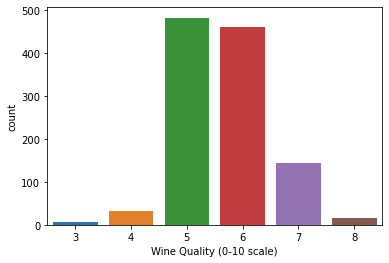

In [26]:
#distribution of class label
sn.countplot(x="quality", data=dataset)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

In [27]:
#Splitting class label from other features
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

# adding extra column because of Multiple linear regression
X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Prediction
prediction=regressor.predict(X_test)

In [28]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,708.441419
1,1020.744159
2,529.983833
3,646.844180
4,813.974070


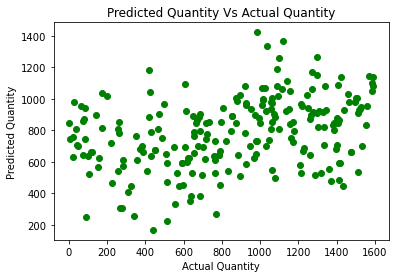

In [21]:
#displaying results
plt.scatter(y_test,prediction, c='g')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()